In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import os
import glob
from sklearn import preprocessing
from pysptools import spectro as sp
from IPython.display import display
import ipywidgets as widgets
from math import*
import peakutils
import rampy as rp

In [9]:
###https://towardsdatascience.com/removing-spikes-from-raman-spectra-8a9fdda0ac22
path = "../data/LR-Raman/"
txt_files = glob.glob(path + "/**/*.txt", recursive = True)

### normalizing and baseline removal (OLD)

In [7]:
for index in range(len(txt_files)):
    temp = pd.read_csv(txt_files[index], skiprows = 10, header = None, sep=',')[:-1]
    raman = pd.DataFrame(list(map(float, temp[0])))
    normalized_spectraValue = preprocessing.normalize([temp[1]])[0]
    baseline_values = peakutils.baseline(normalized_spectraValue)
    result = normalized_spectraValue - baseline_values
    raman[1] = result
    raman.columns = ['wave','reflectance']
    raman.to_csv(txt_files[index].replace('LR-Raman', 'LR-Raman_Processed'), index=None, sep=' ')

KeyboardInterrupt: 

### normalizing, trimming and baseline removal ideal dataset

In [10]:
for index in range(len(txt_files)):
    temp = pd.read_csv(txt_files[index], skiprows = 10, header = None, sep=',')[:-1]
    x_old = list(map(float, temp[0]))
    normalized_spectraValue = preprocessing.normalize([temp[1]])[0]
    baseline_values = peakutils.baseline(normalized_spectraValue)
    result = normalized_spectraValue - baseline_values
    x_new = np.arange(160., 4001., 1.)
    y_new = rp.resample(x_old, result, x_new, fill_value="extrapolate")
    raman = pd.DataFrame(x_new)
    raman[1] = y_new
    raman.columns = ['wave','reflectance']
    targetPath = txt_files[index].replace('LR-Raman', 'LR-Raman_Processed')
    raman.to_csv(targetPath, index=None, sep=' ')

<AxesSubplot:xlabel='wave'>

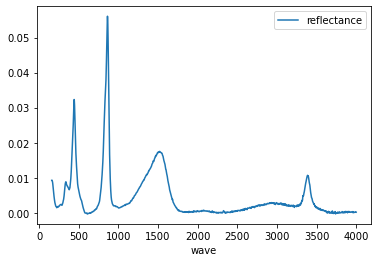

In [319]:
#raman.plot(x='wave',y='reflectance')

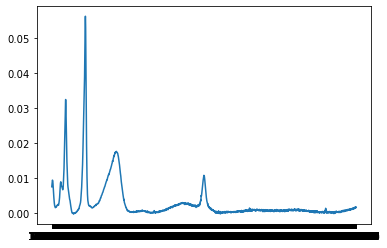

In [320]:
#plt.plot(temp[0], result)
#max(raman.reflectance)

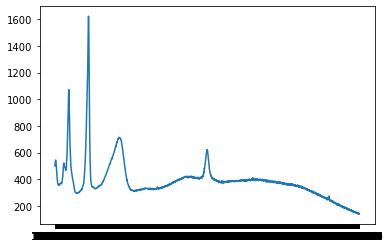

In [321]:
#plt.plot(temp[0], temp[1])

### normalizing, trimming and baseline removal ideal dataset

In [11]:
###https://towardsdatascience.com/removing-spikes-from-raman-spectra-8a9fdda0ac22
path = "../data/Vulcano Raman/"
esp_files = glob.glob(path + "/**/*.esp", recursive = True)

In [12]:
for index in range(len(esp_files)):
    temp = pd.read_csv(esp_files[index], header = None, sep=' ')
    if temp.isnull().values.any():
        temp = pd.read_csv(esp_files[index], skiprows = 2, header = None, sep=' ')
    x_old = list(map(float, temp[0]))
    normalized_spectraValue = preprocessing.normalize([temp[1]])[0]
    baseline_values = peakutils.baseline(normalized_spectraValue)
    result = normalized_spectraValue - baseline_values
    x_new = np.arange(160., 4001., 1.)
    y_new = rp.resample(x_old, result, x_new, fill_value="extrapolate")
    raman = pd.DataFrame(x_new)
    raman[1] = y_new
    raman.columns = ['wave','reflectance']
    targetPath = esp_files[index].replace('Vulcano Raman', 'Vulcano Raman Processed').replace('esp', 'txt')
    targetFolder = targetPath.split('/')[:-1]
    targetFolder = '/'.join(targetFolder) + '/'
    os.makedirs(targetFolder, exist_ok=True)
    raman.to_csv(targetPath, index=None, sep=' ')

### images plot

FileNotFoundError: [Errno 2] No such file or directory: '../data/LR-Raman_images/Rruffite__R070431__Broad_Scan__532__0__unoriented__Raman_Data_Processed__21652.png'

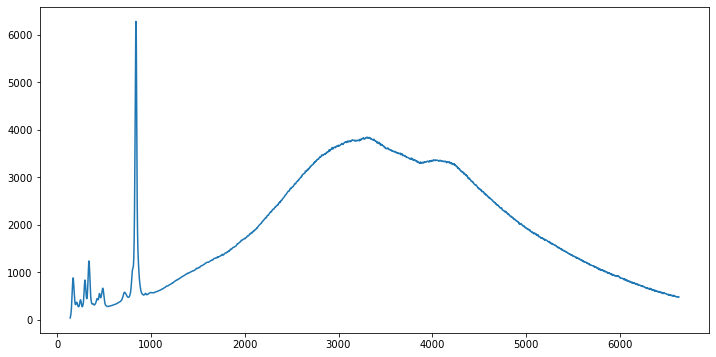

In [197]:
for index in range(len(txt_files)):
    temp = pd.read_csv(txt_files[index], skiprows = 10, header = None, sep=',')[:-1]
    raman = pd.DataFrame(list(map(float, temp[0])))
    raman[1] = temp[1]
    
    fig = plt.figure(figsize=(12, 6))
    plt.plot(raman[0], raman[1])
    plt.savefig(txt_files[index].replace('LR-Raman', 'LR-Raman_images').replace('txt','png'), dpi=fig.dpi)
    plt.close()

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])